In [1]:
%cd ".."

C:\Users\Behnia2P2\Navid\Projects\dreye


In [2]:
from dreye.estimators.dependent_excitation_models import DependentExcitationFit

In [3]:
import dreye
import numpy as np

In [4]:
pr_model = dreye.create_photoreceptor_model(
    [350, 400, 560], 
)

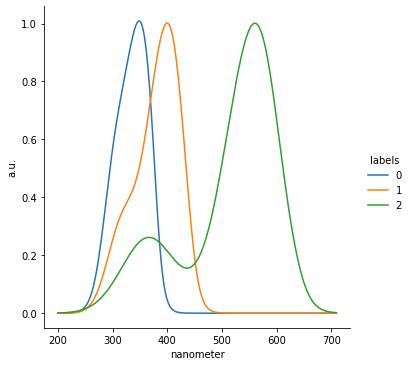

In [5]:
pr_model.sensitivity.plot()

In [6]:
measured_spectra = dreye.create_measured_spectra_container(
    [340, 370, 400, 450, 500, 550, 615]
)

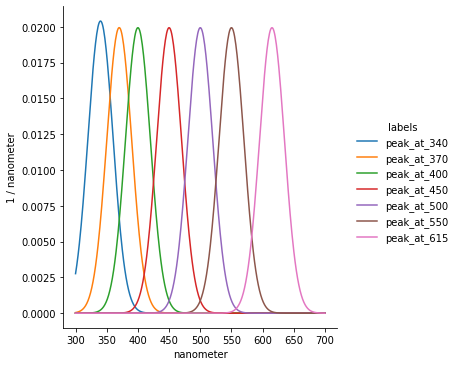

In [7]:
measured_spectra.normalized_spectra.plot()

In [8]:
X = pr_model.capture(
    measured_spectra.normalized_spectra[:, [1,2,3]], 
    return_units=False
)

In [9]:
model = DependentExcitationFit(
    photoreceptor_model=pr_model, 
    measured_spectra=measured_spectra,
    seed=1, 
    independent_layers=4, 
    bit_depth=1,
    n_epochs = 10
    #ignore_bounds=True
)

In [10]:
model.fit(X)

C:\Users\Behnia2P2\Navid\Projects\dreye\dreye\estimators\dependent_excitation_models.py:208: RuntimeWarning: Convergence was not accomplished for X; increase the number of epochs.
  warnings.warn("Convergence was not accomplished "


DependentExcitationFit(independent_layers=4,
                       measured_spectra=MeasuredSpectraContainer([[0.0 0.0920818907631377 0.1841637815262754 0.2762456722894131] [0.0 0.10163909943989607 0.20327819887979215 0.3049172983196882] [0.0 0.1119081335011885 0.223816267002377 0.33572440050356545] ... [0.0 1.8055757729834933e-70 3.611151545966987e-70 5.4167273189504794e-70] [0.0 7.36850...606e-54 8.700582901664521e-54 1.3050874352496782e-53] ... [0.0 0.00012104451606887969 0.00024208903213775938  0.00036313354820663907] [0.0 9.823950044443404e-05 0.00019647900088886808 0.0002947185013333021] [0.0 7.953191433911009e-05 0.00015906382867822018 0.00023859574301733025]] microspectral_E_Q),
                       n_epochs=10,
                       photoreceptor_model=LinearPhotoreceptor(0, 1, 2),
                       seed=1)

In [11]:
model.score()

-18.803967050723774

In [13]:
np.round(model.excite_X_, 2)

array([[0.62, 0.73, 0.24],
       [0.17, 0.86, 0.21],
       [0.  , 0.28, 0.2 ]])

In [14]:
np.round(model.fitted_excite_X_, 2)

array([[0.31, 0.51, 0.22],
       [0.  , 0.  , 0.  ],
       [0.31, 0.51, 0.22]])

In [15]:
np.round(model.layer_intensities_, 2)

array([[1.178e+01, 4.100e-01, 5.537e+01, 0.000e+00],
       [2.383e+01, 2.800e-01, 7.410e+00, 0.000e+00],
       [4.498e+01, 5.100e-01, 5.192e+01, 0.000e+00],
       [5.181e+01, 5.900e-01, 6.410e+00, 0.000e+00],
       [9.990e+01, 9.000e-02, 3.616e+01, 0.000e+00],
       [2.860e+01, 0.000e+00, 7.950e+00, 0.000e+00],
       [3.670e+01, 3.000e-02, 1.378e+01, 0.000e+00]])

In [16]:
model.pixel_strength_

array([[0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5]])

In [44]:
model.fitted_intensities_

array([[7.06642526e-02, 3.82562312e-01, 6.27018360e-02, 4.91485434e-01,
        1.42632629e-13, 2.95226449e-05, 3.47405056e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06642526e-02, 3.82562312e-01, 6.27018360e-02, 4.91485785e-01,
        1.49694371e-09, 2.95547472e-05, 3.47405056e-03]])

In [22]:
import cvxpy as cp
import numpy as np
# Generate a random problem
np.random.seed(0)
m, n, o = 6, 100, 3  # n_leds, n_pixel, n_layers
bits = 7
no = 4

x_true = np.random.randint(bits, size=(o, n))

A = np.random.rand(m, o)  # n_leds, n_layers
B = np.random.rand(no, m)  # self.A_  #. # self.get_capture(w)
# b = np.random.randn(m)
b = B @ (A @ x_true)  # n_leds, n_pixel
# Construct a CVXPY problem
x = cp.Variable((o, n), integer=True)
constraints = [x >= 0, x <= bits-1]
#constraints = []
objective = cp.Minimize(cp.sum_squares(B @ (A @ x) - b))
prob = cp.Problem(objective, constraints)
result = prob.solve(
    # verbose=True
    solver='ECOS_BB'
)

print(result)
print("Status: ", prob.status)
print("The optimal value is", prob.value)

1.3375596382032472e-09
Status:  optimal
The optimal value is 1.3375596382032472e-09


In [23]:
np.round(x.value, 0) - x_true

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0